# <center> **Hotel Reservations** </center>
### **Giới thiệu bộ dữ liệu:**
- Hiện nay có rất nhiều kênh đặt phòng khách sạn trực tuyến, nó khiến cho việc đặt phòng trở nên dễ dàng hơn. Nhưng cũng chính vì thế việc hủy đặt phòng cũng dễ dàng. Những lý do chính cho việc hủy bỏ là thay đổi kế hoạch, xung đột lịch trình,...Việc hủy bỏ làm ảnh hưởng xấu đến doanh thu của khách sạn. 

- Bộ dữ liệu bao gồm 19 đặc trưng thông tin chi tiết của khách đặt phòng:
  - **Booking_ID**: đinh danh cá nhân mỗi lần đặt phòng
  - **no_of_adults**: Số lượng người lớn
  - **no_of_children**: Số lượng trẻ em
  - **no_of_weekend_nights**: Số đêm cuối tuần (T7, CN), khách ở lại hoặc đã đặt chỗ.
  - **no_of_week_nights**: Số đêm trong tuần (T2 - T6), khách ở lại hoặc đã đặt chỗ.
  - **type_of_meal_plan**: Loại kế hoạch bữa ăn được đặt bởi khách hàng.
  - **required_car_parking_space**: Khách hàng có yêu cầu chỗ đặt xe hơi hay không? (0 - No, 1 - Yes)
  - **room_type_reserved**: Loại phòng khách hàng đặt
  - **lead_time**: Số ngày giữa ngày đặt phòng và ngày đến.
  - **arrival_year**: Năm đến.
  - **arrival_month**: Tháng đến.
  - **arrival_date**: Ngày đến.
  - **market_segment_type**: Loại phân khúc thị trường.
  - **repeated_guest**: Có phải là khách cũ hay không? (0 - No, 1 - Yes)
  - **no_of_previous_cancellations**: Số lượng đặt phòng trước đó đã bị khách hàng hủy bỏ trước khi đặt phòng hiện tại.
  - **no_of_previous_bookings_not_canceled**: Số lượng đặt phòng trước đó không bị khách hàng hủy bỏ trước khi đặt phòng hiện tại.
  - **avg_price_per_room**: Giá trung bình mỗi ngày đặt phòng, giá phòng là linh động.
  - **no_of_special_requests**: Số lượng yêu cầu đặc biệt của khách hàng (VD: tầng trên cao, view biển,...).
  - **booking_status**: Trạng thái cho biết phòng đó bị hủy hay không?

- Nguồn dữ liệu:  **[Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)**


# **Tiền xử lý dữ liệu:**

In [ ]:
# Thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
# Đọc dữ liệu
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# encode những cột categorical từ dạng chuỗi sang dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status']) # 'Canceled': 0, 'Not_Canceled': 1

In [ ]:
# Chia tập dữ liệu
X = df.drop(['booking_status','Booking_ID'], axis = 1)
X = X.values
y = df['booking_status']

In [ ]:
df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

Vì dữ liệu bị lệch nên ta phải tiến hành cân bằng dữ liệu

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
y.value_counts()

1    24390
0    24390
Name: booking_status, dtype: int64

Bây giờ dữ liệu đã được cân bằng, tiếp theo ta sẽ chuẩn hóa dữ liệu  
Lý do ta cần over sampling class bị thiếu là bởi vì ta không muốn cho các mô hình học máy thiên vị về bên class có nhiều data point hơn, đồng thời cân bằng cho máy học để có thể dự đoán chính xác hơn cho cả 2 class.  

`Lợi ích của việc xài over-sampling này là:` tăng performance cho máy học, bias correction, và đỡ tốn thời gian để thu thập thêm dữ liệu mới.  
`Tác hại của việc xài over-sampling:` bị Overfiting (có thể data point mới bản gốc của nó), mất mát thông tin(loss of information - data point mới được sinh ra không giữ được những đặc trưng đặc biệt của nhóm ít data hơn)

In [ ]:
# Chuẩn hóa dữ liệu để đưa dữ liệu về cùng tỉ lệ, tránh phụ thuộc vào 1 đặc trưng nào đó 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
# Chia dữ liệu 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 0)

# **Xây dựng Mô hình:**

## Mô hình 1: Logistic Regression

In [ ]:
# Huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(logistic.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(logistic.predict(X_test), y_test))

Độ chính xác trên tập Train 0.7762658876588766
Độ chính xác trên tập Test 0.7764452644526445


Accuracy = 0.7764452644526445


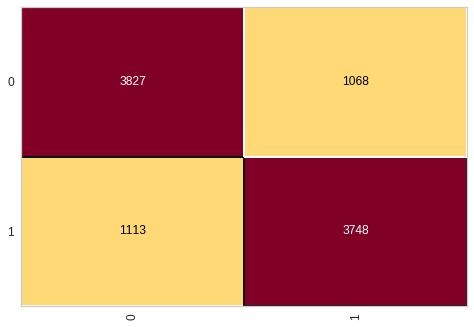

In [ ]:
# Đánh giá confusion matrix
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)

print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      4895
           1       0.78      0.77      0.77      4861

    accuracy                           0.78      9756
   macro avg       0.78      0.78      0.78      9756
weighted avg       0.78      0.78      0.78      9756



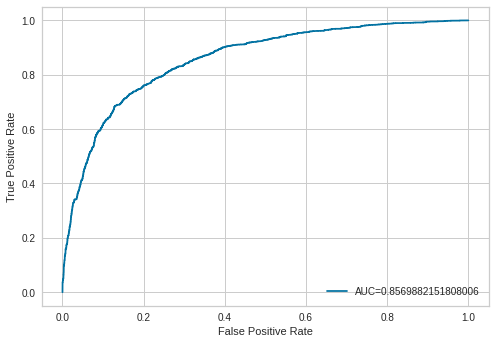

In [ ]:
#define metrics
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.776 => Mô hình dự đoán khá tốt
- Ta thấy chỉ số AUC (Are under curve) = 0.857 cho thấy model phân loại khá chính xác giữa 2 lớp với nhau

# Mô hình 2: Decision Tree

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}
# Tìm kiếm siêu tham số cho mô hình
model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)
# Các siêu tham số tối ưu của mô hình
print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.8646730745677818


In [ ]:
# Huấn luyện và dự đoán
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(decision_tree.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(decision_tree.predict(X_test), y_test))

Độ chính xác trên tập Train 0.8814063140631406
Độ chính xác trên tập Test 0.8682861828618286


Accuracy = 0.8682861828618286


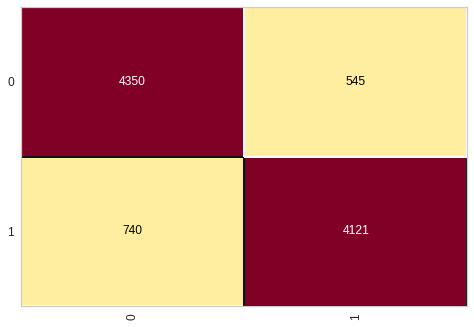

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4895
           1       0.88      0.85      0.87      4861

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



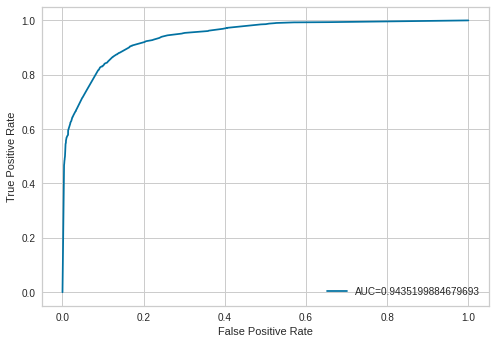

In [ ]:
#define metrics
y_pred_proba = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.868 => Mô hình dự đoán tốt
- Ta nhận thấy AUC ở decision tree cho ra dự đoán chính xác tốt hơn ở 2 lớp, cụ thể là AUC = 0.94%

# Mô hình 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo các giá trị siêu tham số
n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}
# Tìm siêu tham số tối ưu nhất cho mô hình
model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)
# Các siêu tham số tìm được
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8716686756344009
Min Split:  4
Max Nvl:  11


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(random_forest.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(random_forest.predict(X_test), y_test))

Độ chính xác trên tập Train 0.8807913079130791
Độ chính xác trên tập Test 0.8763837638376384


Accuracy = 0.8763837638376384


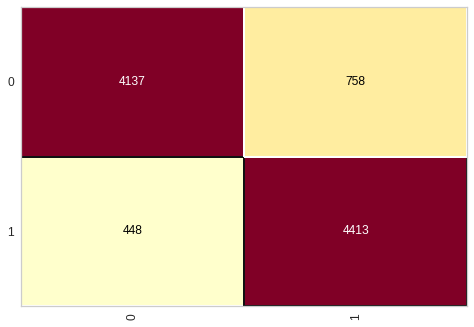

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4895
           1       0.85      0.91      0.88      4861

    accuracy                           0.88      9756
   macro avg       0.88      0.88      0.88      9756
weighted avg       0.88      0.88      0.88      9756



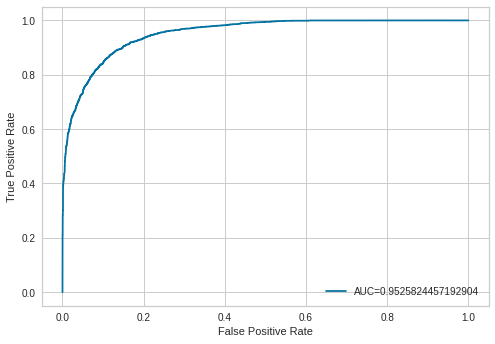

In [ ]:
#define metrics
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.876 => Mô hình hoạt động tốt
- AUC = 95.2%, là model có chỉ số cao nhất cho thấy khi model dự đoán là positive thì khả năng là true positive lên tận 95.2%, chỉ 4.8% còn lại là khả năng sẽ bị False positive khi mô hình dự đoán là positive

# Mô hình 4: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

print("n_neighbors tốt nhất:",grid.best_params_)

n_neighbors tốt nhất: {'n_neighbors': 1}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(knn.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(knn.predict(X_test), y_test))

Độ chính xác trên tập Train 0.997360598605986
Độ chính xác trên tập Test 0.9074415744157441


Accuracy = 0.9074415744157441


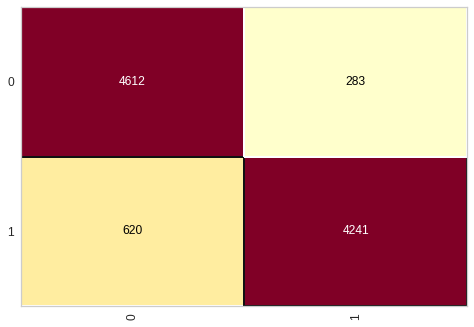

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4895
           1       0.94      0.87      0.90      4861

    accuracy                           0.91      9756
   macro avg       0.91      0.91      0.91      9756
weighted avg       0.91      0.91      0.91      9756



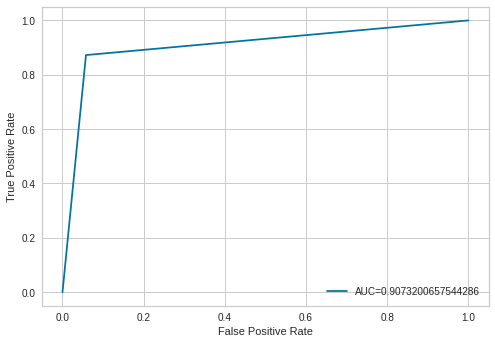

In [ ]:
#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.907 => Mô hình dự đoán rất tốt
- Với AUC=98% cũng khá cao cho mô hình cơ bản như KNN

# Mô hình 5: Support Vector Machines (SVMs):

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='poly', C=1.0, probability=True)
SVM.fit(X_train, y_train)
previsoes = SVM.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(SVM.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(SVM.predict(X_test), y_test))

Độ chính xác trên tập Train 0.8194188191881919
Độ chính xác trên tập Test 0.8207257072570726


Accuracy = 0.8207257072570726


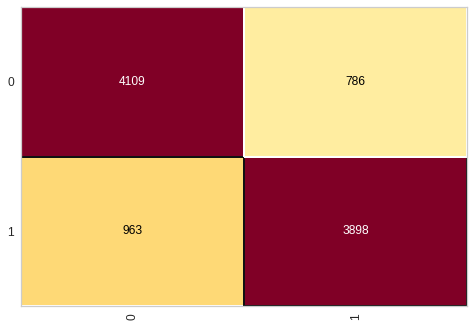

In [ ]:
cm = ConfusionMatrix(SVM)
cm.fit(X_train, y_train)
print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      4895
           1       0.83      0.80      0.82      4861

    accuracy                           0.82      9756
   macro avg       0.82      0.82      0.82      9756
weighted avg       0.82      0.82      0.82      9756



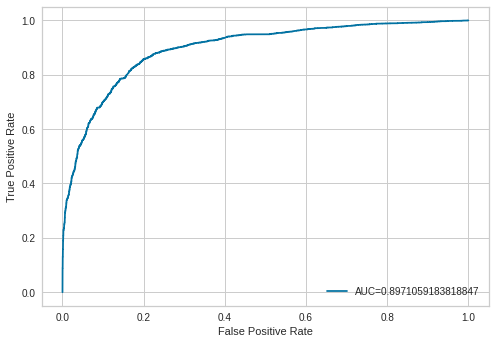

In [ ]:
#define metrics
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.820 => Mô hình dự đoán tốt
- AUC=89.7%, ta thấy thấp hơn so với 1 số mô hình trên.

# Mô hình 6: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

In [ ]:
# Kiểm tra Overfitting
print("Độ chính xác trên tập Train",accuracy_score(naive_bayes.predict(X_train), y_train))
print("Độ chính xác trên tập Test",accuracy_score(naive_bayes.predict(X_test), y_test))

Độ chính xác trên tập Train 0.5670612956129562
Độ chính xác trên tập Test 0.5712382123821238


Accuracy = 0.5712382123821238


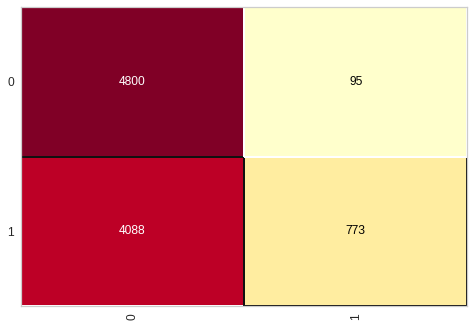

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
print("Accuracy =",cm.score(X_test, y_test))

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      4895
           1       0.89      0.16      0.27      4861

    accuracy                           0.57      9756
   macro avg       0.72      0.57      0.48      9756
weighted avg       0.71      0.57      0.48      9756



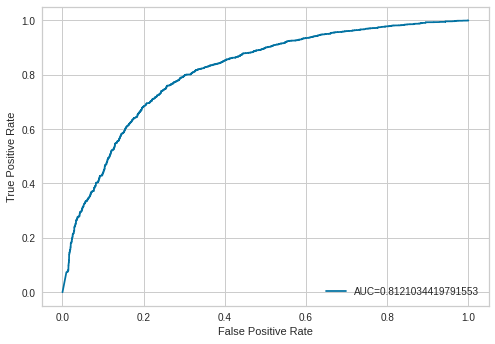

In [ ]:
#define metrics
y_pred_proba = naive_bayes.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.571 => Mô hình dự đoán không tốt
- Ở model này AUC=0.812, thấp nhất trong số các model trên

# Mô hình 7: Neural Network

In [ ]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
# Tạo mô hình neural networks rỗng
model = Sequential()

# Thêm các lớp Layer 
model.add(Dense(200, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))


from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

# Tổng hợp mô hình Neural networks để huấn luyện
model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs = 100, batch_size = 400, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
86/86 [==============================] - 2s 12ms/step - loss: 0.5063 - acc: 0.7551 - val_loss: 0.4450 - val_acc: 0.7908
Epoch 2/100
86/86 [==============================] - 1s 10ms/step - loss: 0.4335 - acc: 0.7962 - val_loss: 0.4291 - val_acc: 0.8010
Epoch 3/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4231 - acc: 0.8022 - val_loss: 0.4175 - val_acc: 0.8072
Epoch 4/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4112 - acc: 0.8115 - val_loss: 0.4083 - val_acc: 0.8084
Epoch 5/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4021 - acc: 0.8153 - val_loss: 0.3969 - val_acc: 0.8169
Epoch 6/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3959 - acc: 0.8162 - val_loss: 0.3916 - val_acc: 0.8193
Epoch 7/100
86/86 [==============================] - 1s 8ms/step - loss: 0.3906 - acc: 0.8206 - val_loss: 0.3842 - val_acc: 0.8207
Epoch 8/100
86/86 [==============================] - 1s 8ms/step - loss: 0.3847 -

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Độ chính xác của mô hình là 0.875 => Mô hình dự đoán tốt

# **Phần kết luận:**


| No. | Model | Type | Precision |
| :------: | :------: | :------: | :------: |
|1|   Logistic Regression   |   -   |   0.776  |
|2|   Decision Tree   |   Gini   |   0.868   |
|3|   Random Forest   |   Gini   |   0.871   |
|4|   KNN   |   -   |   0.907   |
|5|   SVM   |   -   |   0.820   |
|6|   Naive Bayes   |   Gaussian   |   0.571   |
|7|   Neural Network   |   -   |   0.875  |

### **<u>Nhận xét</u>:**
- Mô hình không bị overfitting
- Mặc dù mô hình Logistic Regression có ưu điểm để phân loại dữ liệu nhị phân nhưng kết quả lại không tốt hơn các mô hình khác.
- Mô hình có kết quả tốt nhất là mô hình KNN
- Mô hình có kết quả tệ nhất là mô hình Naive Bayes